# Plot Discount Rate Three Subplot

In [27]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.transforms import offset_copy
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.lines import Line2D
import pickle
import copy
from matplotlib.colors import LinearSegmentedColormap
import ipynb.fs.defs.Functions_Equations_Equilibrium_Simulation as baseFuncs
import ipynb.fs.defs.Functions_Optimizer as optFuncs
import ipynb.fs.defs.Functions_Final_Bureaucratic_Levels_Under_Discounting as bureauFuncs

In [19]:
def plotOptPanel(fig, ax, data, showTitle = True, titleText = "(A) Farsighted Organization: \n Low Discount Rate", fontsize = 14, compact_yaxis = False):
    upper_t = data['tau']*len(data['opt_c'])/(data['tau']/data['dt'] + 1)
    x = np.linspace(0, upper_t, len(data['opt_d']))
    if showTitle:
        ax.set_title(titleText, fontsize = fontsize, fontweight = "bold")
    admin_waste = np.asarray(data['prop_Ro'])*np.asarray(data['prop_wA'])
    ax.plot(x, data['prop_Ro'], c = "orange", linestyle = "--", linewidth = 2)
    ax.plot(x, data['prop_wA'], c = "blue", linewidth = 2)
    ax.plot(x, admin_waste, c = "red", linestyle = ":", linewidth = 2)
    ax.plot(x, np.ones(len(data['prop_wA'])), c = "black", linestyle = ":", linewidth = 2)
    
    ax.set_ylabel("Admin. Measures", fontsize = fontsize)
    if compact_yaxis:
        t = offset_copy(ax.transAxes, x=-(ax.yaxis.get_tick_padding() + ax.yaxis.majorTicks[0].get_pad()), fig=fig, units='points')
        ax.yaxis.set_label_coords(0.01, .5, transform=t)
        ax.set_yticks([0,1])
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
    else:
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
    
    ax.set_xlabel(r'Months', fontsize = fontsize, va = 'top')
    t = offset_copy(ax.transAxes, y=-(ax.xaxis.labelpad + ax.xaxis.majorTicks[0].get_pad()), fig=fig, units='points')
    ax.xaxis.set_label_coords(0.5, 0, transform=t)
    
    ax.set_ylim(0,1.05)
    ax.set_xlim([-0.1,upper_t*1.01])
    ticks_temp = np.linspace(np.min(x), np.max(x), 5).astype(int)
    ticks_vals = [t_val for t_it, t_val in enumerate(ticks_temp) if t_it != 2]
    ax.set_xticks(ticks_vals)

## Evaluate (takes over a couple minutes to run)

In [23]:
# First trajectory
para = baseFuncs.paraReset()
para['r_d'] = 0.1
para['dt'] = 0.5
para['discount_rate'] = 0.02
data1 = optFuncs.optimizer(para, 3, 120, 200, saveName = f"DynOpt Data for tau=3, T=120, and dr={para['discount_rate']}", 
                           saveData = True, run_to_eql = True, tol = 1e-3)

# Second trajectory
para = baseFuncs.paraReset()
para['r_d'] = 0.1
para['dt'] = 0.5
para['discount_rate'] = 0.21
data2 = optFuncs.optimizer(para, 3, 120, 200, saveName = f"DynOpt Data for tau=3, T=120, and dr={para['discount_rate']}", 
                           saveData = True, run_to_eql = True)

## Or load previously generated data

In [31]:
# First Trajectory
loadName = "Discounted Optimizations/dynOpt, T = 120, tau = 3, discount rate = 0.0, to equil = True"
file = open(loadName, 'rb')
data1 = pickle.load(file)
file.close()

# Second Trajectory
loadName = "Discounted Optimizations/dynOpt, T = 120, tau = 3, discount rate = 0.21, to equil = True"
file = open(loadName, 'rb')
data2 = pickle.load(file)
file.close()

## Plot the results

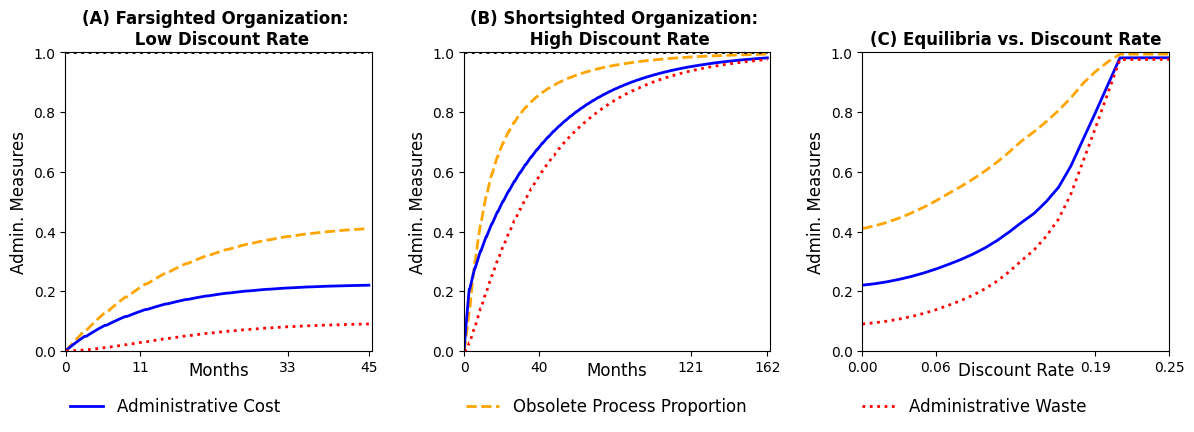

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 4))
fontsize = 12 #fontsize

# Plotting first panel
plotOptPanel(fig, ax1, data1, showTitle = True, titleText = "(A) Farsighted Organization: \n Low Discount Rate", 
             fontsize = fontsize, compact_yaxis = False)
ax1.set_ylim([0,1])

#fig.subplots_adjust(hspace = 0.2, wspace = 0.4)
plt.tight_layout(h_pad = 1.08, w_pad = 2.4)

# Plotting second panel
plotOptPanel(fig, ax2, data2, showTitle = True, titleText = "(B) Shortsighted Organization: \n High Discount Rate", 
             fontsize = fontsize, compact_yaxis = False)
ax2.set_ylim([0,1])

# Plotting third panel
bureauFuncs.plotSavedFinalBureau(fig, ax3, 3, 120, np.linspace(0.0,0.25,26), showTitle = True, fontsize = fontsize, run_to_eql = True,
                                 titleText = "(C) Equilibria vs. Discount Rate", boldTitle = True, showLegend = False)

custom_lines = [Line2D([0], [0], color='blue', lw=2)]
fig.legend(custom_lines, ["Administrative Cost"], handlelength = 2, 
           bbox_to_anchor=(0.05,0.03), loc = "upper left", frameon = False, fontsize = fontsize)
custom_lines = [Line2D([0], [0], color='orange', linestyle = "--", lw=2)]
fig.legend(custom_lines, ["Obsolete Process Proportion"], handlelength = 2, 
           bbox_to_anchor=(0.38,0.03), loc = "upper left", frameon = False, fontsize = fontsize)
custom_lines = [Line2D([0], [0], color='red', linestyle = ":", lw=2)]
fig.legend(custom_lines, ["Administrative Waste"], handlelength = 2, 
           bbox_to_anchor=(0.71,0.03), loc = "upper left", frameon = False, fontsize = fontsize)

#plt.savefig("Fig_9_Optimization_Under_Discounting.png", dpi = 300, bbox_inches = "tight")
plt.show()